In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import os
import librosa



In [ ]:
audio_dataset_path='/content/drive/MyDrive/TRAINING'


In [ ]:
import os
import librosa
import pandas as pd

def extract_features(file_path):   #Defines a function named extract_features that takes a file_path as an argument.
    y, sr = librosa.load(file_path)  #Loads an audio file located at file_path using 'librosa.load()'. It returns the audio waveform y and the sampling rate sr

    #Extracts four different audio features using 'librosa.feature' functions. MFCCs (Mel-Frequency Cepstral Coefficients),
     #Chroma features, Zero Crossing Rate, and Spectral Centroid are extracted from the audio waveform y.
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    return mfccs, chroma, zero_crossing_rate, spectral_centroid   #Returns these extracted features from the function.

def process_folder(folder_path):  #Defines a function process_folder that takes a folder_path as an argument.
    features_list = []             # Initializes an empty list to store the extracted features and their associated labels.
    for filename in os.listdir(folder_path):  #The for loop iterates through each file in the directory specified by folder_path.
        if filename.endswith('.wav'):  #Checks if the file has a '.wav' extension, assuming the audio files are in WAV format.
            file_path = os.path.join(folder_path, filename)  #Creates the full file path by joining the folder path and the filename.
            mfccs, chroma, zero_crossing_rate, spectral_centroid = extract_features(file_path)
            label = get_label(filename)
            features = {
                'feature': mfccs.mean(axis=1).tolist() + chroma.mean(axis=1).tolist() +
                           zero_crossing_rate.mean(axis=1).tolist() + spectral_centroid.mean(axis=1).tolist(),
                'label': label,
            }
            features_list.append(features)
    return features_list

def get_label(file_name):
    if 'G - Muted' in file_name:
        return 'g muted'
    else:
        return 'g correct'

#Extract features and labels: Calls the extract_features function to get the audio features and calls get_label to determine the label based on the filename.

#Creating a feature dictionary: Creates a dictionary features containing the concatenated mean values of different features and their corresponding label.


folder_path = '/content/drive/MyDrive/TRAINING'
extracted_features = process_folder(folder_path)

# Convert the extracted features to a DataFrame
extracted_features_df = pd.DataFrame(extracted_features)

# Print the DataFrame
print(extracted_features_df)


                                               feature      label
0    [-447.4845886230469, 73.09541320800781, 40.106...    g muted
1    [-418.9053955078125, 52.48165512084961, 17.445...    g muted
2    [-406.71221923828125, 62.560630798339844, -13....    g muted
3    [-472.2129211425781, 63.41244888305664, 26.820...    g muted
4    [-465.9186096191406, 60.71059799194336, 4.5694...    g muted
..                                                 ...        ...
116  [-424.48919677734375, 100.8794174194336, 24.84...  g correct
117  [-432.6346130371094, 100.75639343261719, 25.74...  g correct
118  [-526.615234375, 137.49990844726562, 14.868563...  g correct
119  [-417.17724609375, 105.28143310546875, 12.7329...  g correct
120  [-571.0491943359375, 125.1643295288086, 26.464...  g correct

[121 rows x 2 columns]


In [ ]:
extracted_features_df.head()

,feature,label
0,"[-447.4845886230469, 73.09541320800781, 40.106...",g muted
1,"[-418.9053955078125, 52.48165512084961, 17.445...",g muted
2,"[-406.71221923828125, 62.560630798339844, -13....",g muted
3,"[-472.2129211425781, 63.41244888305664, 26.820...",g muted
4,"[-465.9186096191406, 60.71059799194336, 4.5694...",g muted


In [ ]:
# Save the DataFrame as a CSV file
output_csv_path = '/content/drive/MyDrive/extracted_features.csv'
extracted_features_df.to_csv(output_csv_path, index=False)

In [ ]:
import numpy as np

In [ ]:
#X: This variable is being used to store the features for your machine learning model. It's conventionally used to represent the input data in machine learning.

#np.array(): This is creating a NumPy array, a fundamental data structure in numerical computing in Python.

#extracted_features_df['feature']: This is selecting the 'feature' column from the DataFrame extracted_features_df, which contains the concatenated mean
# values of the different audio features for each audio file.

#.tolist(): This is converting the values in the 'feature' column to a Python list.

#np.array(...) wraps the list in a NumPy array.

X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['label'].tolist())   #similarly it store the labels and performs the same thing that is done by X

In [ ]:
X.shape


(121, 34)

In [ ]:
y=np.array(pd.get_dummies(y))  #one hot encoding being applied to y, this transformation is necessary to give ml model a numerical input


In [ ]:
y.shape


(121, 2)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-4.72412659e+02,  4.24644547e+01,  1.34115915e+01, ...,
         4.43582051e-02,  4.95182292e-02,  1.47347930e+03],
       [-4.13487579e+02,  6.81819763e+01,  2.10493145e+01, ...,
         6.08694479e-02,  2.55808644e-02,  1.04010459e+03],
       [-4.02238190e+02,  1.00341560e+02,  1.90506535e+01, ...,
         9.41649497e-01,  1.85888672e-02,  6.10115039e+02],
       ...,
       [-4.32634613e+02,  1.00756393e+02,  2.57437325e+01, ...,
         8.85583997e-01,  2.33008708e-02,  6.87133785e+02],
       [-4.05835052e+02,  7.18636475e+01,  3.77503467e+00, ...,
         1.34404182e-01,  4.79882813e-02,  1.37562258e+03],
       [-4.22283386e+02,  5.13687744e+01, -3.99308753e+00, ...,
         1.45271078e-01,  3.52035030e-02,  1.26759691e+03]])

In [ ]:
y


array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [ ]:
X_train.shape


(96, 34)

In [ ]:
X_test.shape


(25, 34)

In [ ]:
y_train.shape


(96, 2)

In [ ]:
y_test.shape


(25, 2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
model = Sequential()        #Creating a Sequential model


# First layer
model.add(Dense(64, input_shape=(34,)))  #A dense layer with 64 neurons and an input shape of (34,), which corresponds to the number of features in your data.
model.add(Activation('relu'))  #An activation layer using the Rectified Linear Unit (ReLU) activation function.
model.add(Dropout(0.5))  #A dropout layer with a dropout rate of 0.5, to prevent overfitting by randomly deactivating some neurons during training

# Second layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final layer for binary classification
model.add(Dense(1, activation='sigmoid')) #final dense layer with 1 neuron is used.
                                          # as this is a binary classification problem, a sigmoid activation function is used, which maps the output to a
                                          #probability between 0 and 1.

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#optimizer='adam': The Adam optimizer is used for optimizing the model's weights during training.
#loss='binary_crossentropy': The loss function used for binary classification problems.
#It measures the difference between the predicted outputs and the actual labels.
#metrics=['accuracy']: During training, the model's accuracy is tracked and reported.



# Reshape target labels
y_train_reshaped = y_train[:, 0]  #This slice operation selects all rows (:) from the first column (0) of the y_train array.
                                  # It's essentially extracting the labels from the first column.
                                  #y_train_reshaped is now a one-dimensional array containing only the labels from the first column of y_train.
y_test_reshaped = y_test[:, 0]


#y_train and y_test arrays and storing them in y_train_reshaped and y_test_reshaped, respectively



In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                2240      
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

# Fit the model
model.fit(X_train, y_train_reshaped, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test_reshaped), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 74.4969 - accuracy: 0.5469
Epoch 1: val_loss improved from inf to 5.72054, saving model to /content/drive/MyDrive/audio_classification.hdf5
2/2 [==============================] - 2s 309ms/step - loss: 88.2087 - accuracy: 0.5417 - val_loss: 5.7205 - val_accuracy: 0.8000
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 74.9384 - accuracy: 0.4219
Epoch 2: val_loss did not improve from 5.72054
2/2 [==============================] - 0s 33ms/step - loss: 80.2364 - accuracy: 0.4167 - val_loss: 8.1704 - val_accuracy: 0.8000
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 64.5658 - accuracy: 0.4375
Epoch 3: val_loss did not improve from 5.72054
2/2 [==============================] - 0s 37ms/step - loss: 72.9817 - accuracy: 0.4271 - val_loss: 9.6161 - val_accuracy: 0.8000
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 46.4712 - accuracy: 0.5469
Epoch 4: val_loss did not imp

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.5


In [ ]:
# Save the trained model
model.save('audio_classification_model.h5')

print("Model saved.")


Model saved.


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/audio_classification_model.h5')

# Now you can use loaded_model for predictions or further training


In [ ]:
# Assuming you have a function named 'features_extractor' that returns a tuple of features.
# You can replace 'features_extractor' with your actual function name.

# Provide the path to the audio file you want to predict
filename = "/content/drive/MyDrive/TEST/G - Muted 2.wav"

# Extract features from the audio file using the 'features_extractor' function
mfccs, chroma, zero_crossing_rate, spectral_centroid = extract_features(filename)

# Concatenate the extracted features
prediction_feature = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1),
                                     zero_crossing_rate.mean(axis=1), spectral_centroid.mean(axis=1)))

# Reshape the input features to match the model's input shape
prediction_feature = prediction_feature.reshape(1, -1)  # Reshape to (1, number_of_features)

# Make predictions using the loaded model
predicted_probabilities = model.predict(prediction_feature)
predicted_class = int(predicted_probabilities > 0.5)  # Assuming threshold of 0.5

# Map the predicted class back to the label
predicted_label = 'g muted' if predicted_class == 0 else 'g correct'

print("Predicted Label:", predicted_label)
print("Predicted Probabilities:", predicted_probabilities)


1/1 [==============================] - 0s 120ms/step
Predicted Label: g muted
Predicted Probabilities: [[4.9236304e-14]]


1/1 [==============================] - 0s 28ms/step


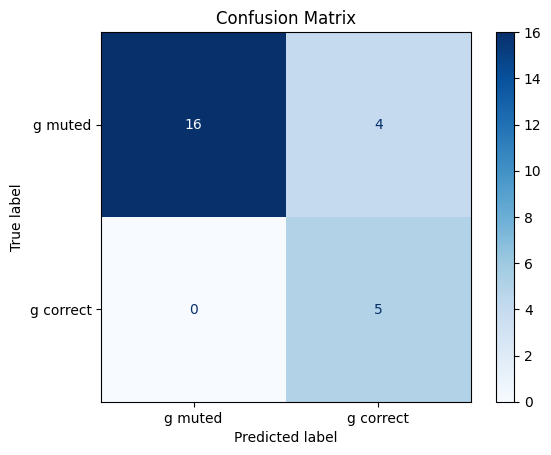

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have your trained model 'model' and test data 'X_test' and 'y_test_reshaped'

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test_reshaped, y_pred)

# Define class labels
class_labels = ['g muted', 'g correct']

# Create a confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')

plt.title('Confusion Matrix')
plt.show()
